In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('/Users/max/Downloads/application_train.csv')


import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

## 一維數據視覺化：核密度估计（kernel density estimation） 

1. 在數據點處為波峰  
2. 曲線下方面積為1  

    KDE可以模擬真實的概率分佈曲線，並得到相對直方圖平滑而漂亮的結果


    http://blog.shaochuancs.com/statistics-kde/


3. 'kernel'是一個函數，用來提供權重

    让我们举个例子，假设我们现在想买房，钱不够要找亲戚朋友借，我们用一个数组来表示 5 个亲戚的财产状况： [8, 2, 5, 6, 4]。我们是中间这个数 5。“核”可以类比 成朋友圈，
    但不同的亲戚朋友亲疏有别，在借钱的时候，关系好的朋友出力多，关系不好的朋友出力少，于是我们可以用权重来表示。
    总共能借到的钱是： 8*0.1 + 2*0.4 + 5 + 6*0.3 + 4*0.2 = 9.2。  

    https://lotabout.me/2018/kernel-density-estimation/

In [51]:
# 數據清理

df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']) # 換成整數
df = df[['TARGET', 'DAYS_BIRTH']] # subset
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / 365 # day-age to year-age
bin_cut =  np.linspace(20, 70, 11) #自 20 到 70 歲，切 11 個點 (得到 10 組)

df['YEARS_BINNED'] = pd.cut(df['YEARS_BIRTH'], 
                                  bins = bin_cut) 

print(df['YEARS_BINNED'].value_counts())
df.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


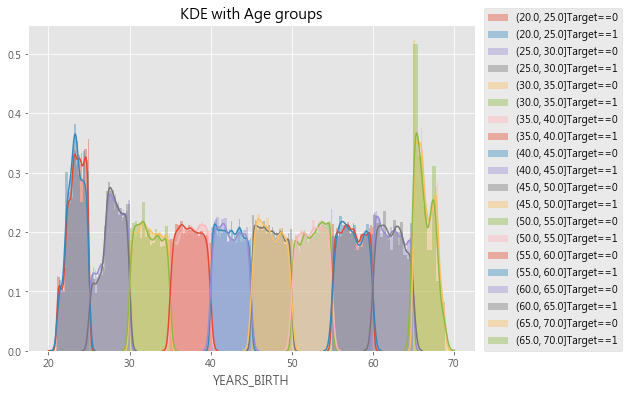

In [28]:
year_group_sorted = df.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(df.loc[(df['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (df['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target==0')
    
    sns.distplot(df.loc[(df['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (df['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target==1')
plt.title('KDE with Age groups')
plt.legend(loc=(1.02, 0))
plt.show()

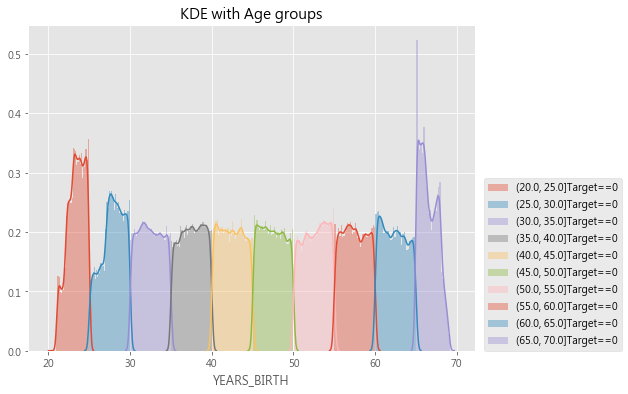

In [25]:
year_group_sorted = df.sort_values(by='YEARS_BINNED')['YEARS_BINNED'].unique()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(df.loc[(df['YEARS_BINNED'] == year_group_sorted[i]) & (df['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target==0')
    
#     sns.distplot(df.loc[(df['YEARS_BINNED'] == year_group_sorted[i]) & \
#                               (df['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]) + 'Target==1')
plt.title('KDE with Age groups')
plt.legend(loc=(1.02, 0))
plt.show()

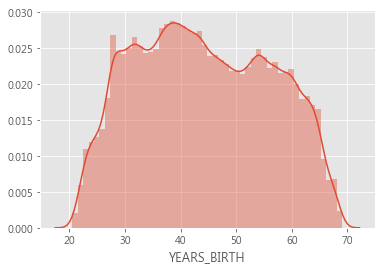

In [42]:
sns.distplot(df.loc[(df['TARGET'] == 0), 'YEARS_BIRTH'])

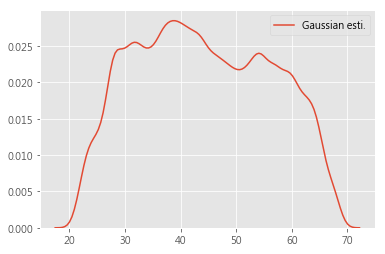

In [44]:
sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')